# Preparation Machine learning


## What do we want to do?
우선 평정과 선택일 때 차이를 한번 보자.(어떤 결과가 나올지 모르지만 해보자.)

## Why do we need to peapare the data?
우선 한 참가자보자.

In [5]:
from nilearn.plotting import plot_anat
import nibabel as nb

In [6]:
img_func = nb.load('D:/fmri/3. derivatives 폴더에 넣어야 하는 것 (전처리 후 데이터, MNI 템플릿)/fmriprep/sub-ID2207071/func/sub-ID2207071_task-r1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')

"\n.slice[...,0] : 첫번째 슬라이스 선택\ndim='auto' : 영상 표시 차원 자동 선택\ndraw_cross : 교차선 표시여부\nannotate : 주석 표시여부\nvmax= : 최대 표시 강도\ncut_coords=[,,] : 영상을 어떤 좌표로 자를지.\n"

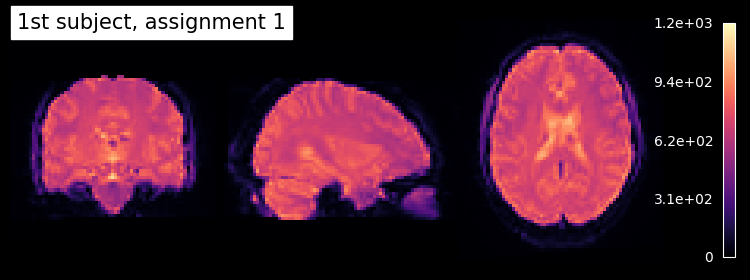

In [7]:
plot_anat(img_func.slicer[...,0], dim='auto', draw_cross=False, annotate=False,
          cmap='magma', vmax=1250, cut_coords=[33,-20,20], colorbar=True,
          title='1st subject, assignment 1')
'''
.slice[...,0] : 첫번째 슬라이스 선택
dim='auto' : 영상 표시 차원 자동 선택
draw_cross : 교차선 표시여부
annotate : 주석 표시여부
vmax= : 최대 표시 강도
cut_coords=[,,] : 영상을 어떤 좌표로 자를지.
'''

## 1. what does the signal time-course of a voxel look like?


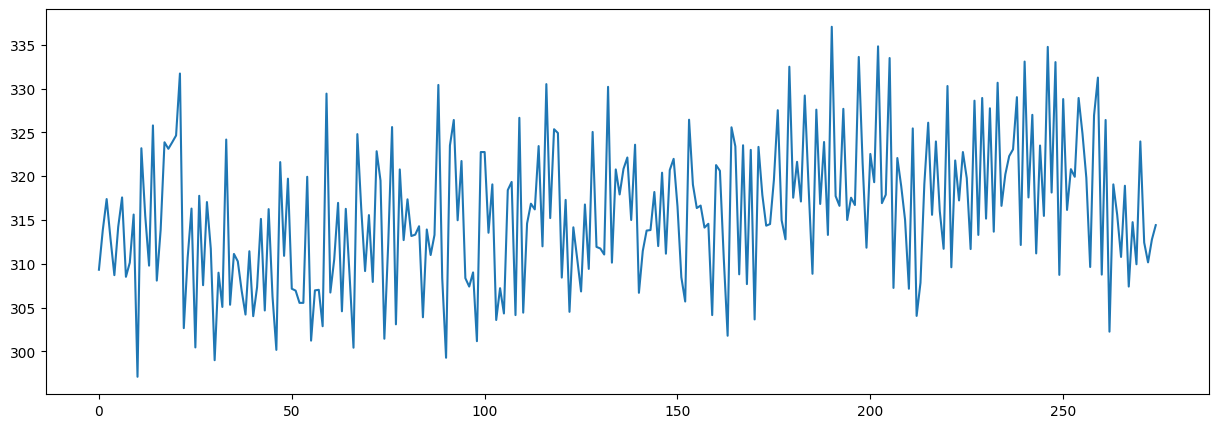

In [16]:
import matplotlib.pyplot as plt

# x:19. y:16, z:17 축의 시계열 데이터.
plt.figure(figsize = (15,5))
plt.plot(img_func.get_fdata()[19,16,17, :])

우선 값이 850? 정도 주변에 중심화되어 있다. 선형 추세가 있는것.. 그래서 선형 추세를 제거하고 이상치를 제거하기 위해 데이터를 z-score로

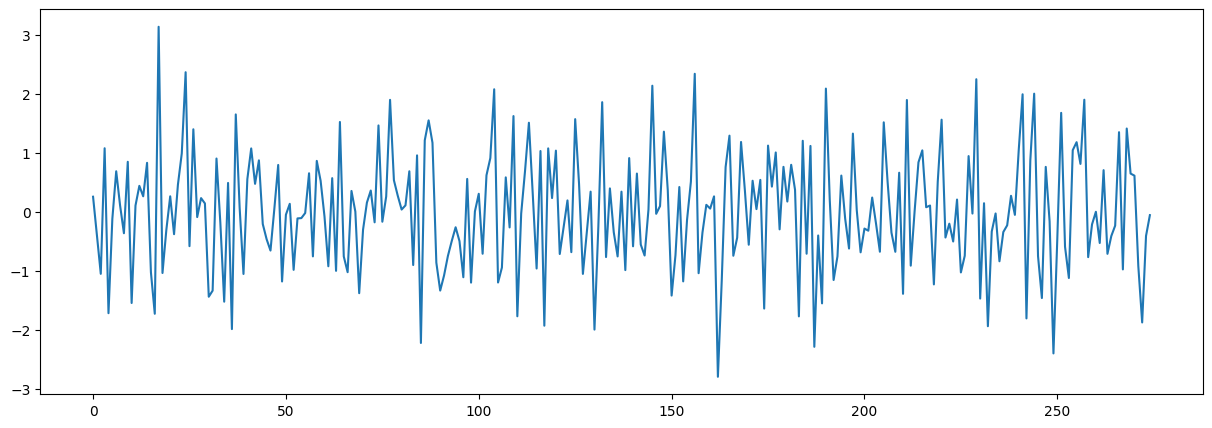

In [22]:
import numpy as np
from nilearn import image


func_ds_c = image.clean_img(img_func, detrend=True, standardize=True, t_r=2,
                          confounds='C:/Users/jin/Desktop/data/fmri/3. derivatives 폴더에 넣어야 하는 것 (전처리 후 데이터, MNI 템플릿)/fmriprep/sub-ID2207071/func/sub-ID2207071_task-r1_desc-confounds_timeseries_1.tsv')

# plot
plt.figure(figsize = (15,5))
plt.plot(func_ds_c.get_fdata()[19,16,17,:])

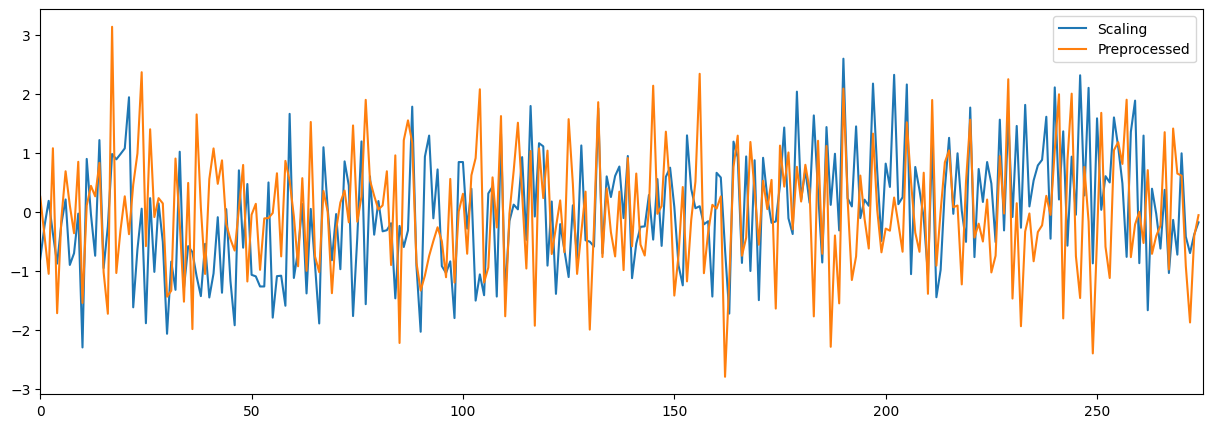

In [26]:
func_s = image.clean_img(img_func, detrend=False, standardize=True, t_r=2)

plt.figure(figsize=(15,5))
plt.xlim(0,275)
plt.plot(np.transpose(func_s.get_fdata()[19,16,17,:]))
plt.plot(np.transpose(func_ds_c.get_fdata()[19,16,17,:]))
plt.legend(['Scaling', 'Preprocessed'])

In [42]:
import pandas as pd
import numpy as np
'''
, '2207272', '2207273',
          '2208041', '2208042', '2208043', '2208231', '2208232', '2208233', '2209022',
          '2209023', '2209222', '2209223', '2303101', '2303102', '2303103', '2303131',
          '2303132', '2303133', '2303161', '2303162', '2303163', '2303201', '2303202', '2303203'
'''

base_path = 'D:/fmri/3. derivatives 폴더에 넣어야 하는 것 (전처리 후 데이터, MNI 템플릿)/fmriprep/sub-ID{}/eve_files/sub-ID{}_task-r1_events.tsv'
sub_ids = ['2207071']

from scipy.interpolate import interp1d

onset_list = []

for sub_id in sub_ids:
    file_path = base_path.format(sub_id, sub_id)
    onset_file = pd.read_csv(file_path, sep='\t')

    events = onset_file['stim_onset'].values
    predictor_all = np.zeros(550, dtype=int)
    
    for i in range(4):
         events1 = events.astype(int) + i
         predictor_all[events1.astype(int)] = 1

    original_scale = np.arange(0, 550, 1) # 0~550 초
    resampler = interp1d(original_scale, predictor_all)

    desired_scale = np.arange(0, 550, 2)
    y = resampler(desired_scale)

    onset_list.append(y)

In [43]:
onset_list

[array([0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
        0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
        0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
        0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
        0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
        1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
        0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
        0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
        1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
        0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
        0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
        0., 

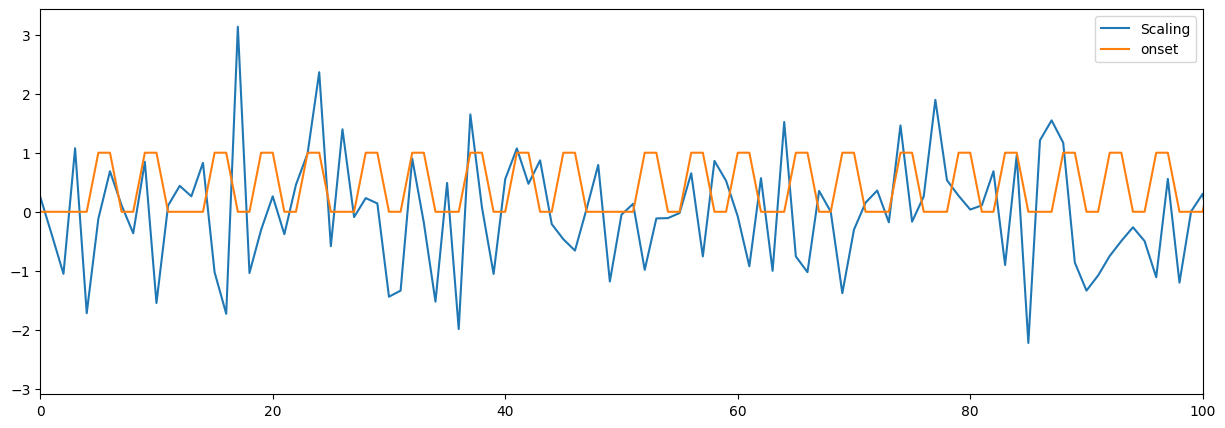

In [39]:
plt.figure(figsize=(15,5))
plt.xlim(0,100)
plt.plot(np.transpose(func_ds_c.get_fdata()[19,16,17,:]))
plt.plot(np.transpose(onset_list))
plt.legend(['Scaling', 'onset'])

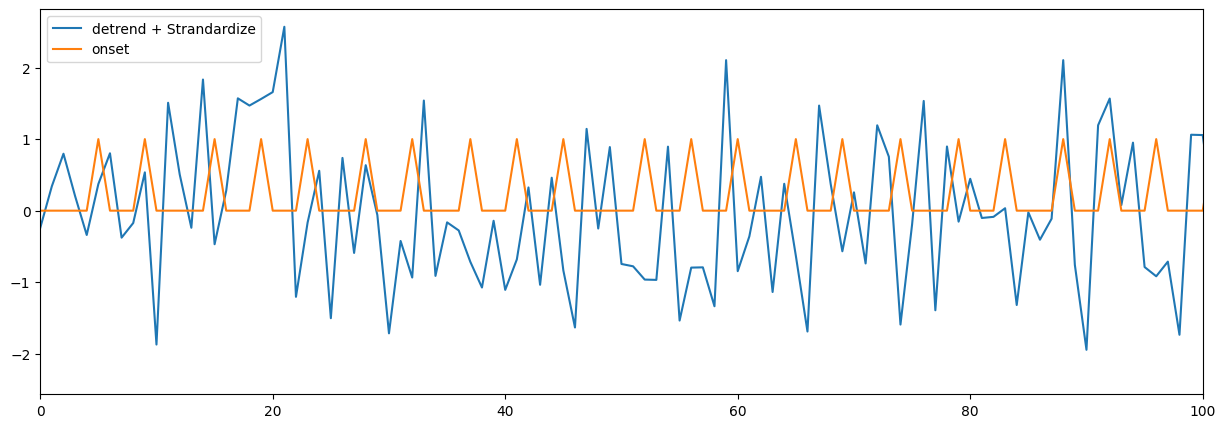

In [34]:
func_ds = image.clean_img(img_func, detrend=True, standardize=True, t_r=2)
plt.figure(figsize=(15,5))
plt.xlim(0,100)
plt.plot(np.transpose(func_ds.get_fdata()[19,16,17,:]))
plt.plot(np.transpose(onset_list))
plt.legend(['detrend + Strandardize', 'onset'])

## How many nonzero voxels do we have?

In [18]:
img_func.get_fdata().shape
# 많이 봤듯이 각 축, 마지막은 시계열

(65, 77, 65, 275)

In [19]:
# mean(axis=1) : 데이터의 두번째 축을 따라 평균 계산(여기선 시계열)
# 얼마나 많은 복셀이 시계열 평균이 0인가
np.sum(img_func.get_fdata().mean(axis=3)!=0)

213646

자 너무 많은 복셀들이 쓰이지 않고 있음.. 이때는 분석을 해도 소용없으니 관심있는 영역만을 남기기 위해 마스크를 사용하자.

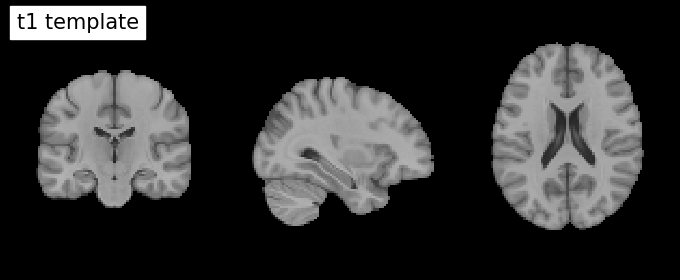

In [21]:
from nilearn.image import math_img

# MNI152 T1 가져오기 !!전체아니라 brain 파일만 !!
t1 = nb.load('D:/fmri/3. derivatives 폴더에 넣어야 하는 것 (전처리 후 데이터, MNI 템플릿)/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_res-02_desc-brain_T1w.nii.gz')
plot_anat(t1, dim='auto', draw_cross=False, annotate=False,
         cut_coords=[33,-20,20], title='t1 template')

In [22]:
t1.shape

(96, 114, 96)

여기서 표준화된 해상도는 4x4x4mm다.
템플릿을 4x4x4mm 해상도의 복셀로 resampling하자

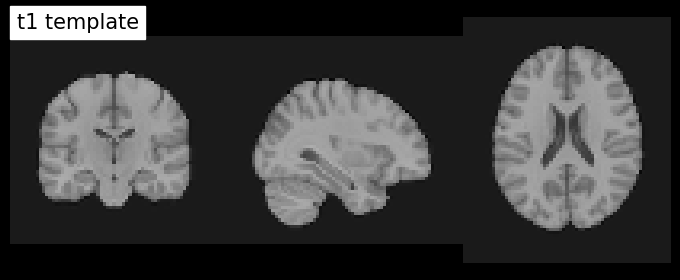

In [23]:
from nilearn.image import resample_to_img

img_resampled = resample_to_img(t1, img_func)

plot_anat(img_resampled, dim='auto', draw_cross=False, annotate=False,
         cut_coords=[33,-20,20], title='t1 template')
# 전에 말했던 것 처럼 이미 t1으로 resampling 된거라 의미가 없게 나온다.

In [24]:
img_resampled.shape

(65, 77, 65)

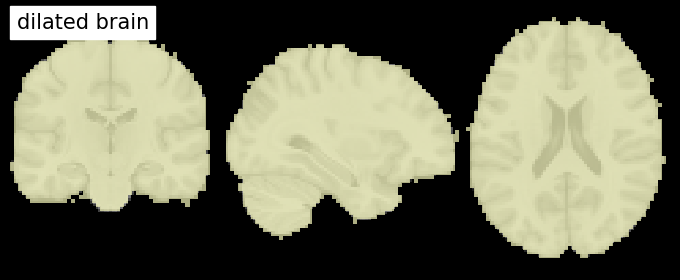

In [31]:
from scipy.ndimage import binary_dilation

# 우리는 이미 T1 표준화된 데이터가 있기 때문에 해당 파일을 참가자별로 불러와서 적용해보자.
# t1_resmapled = nb.load('C:\Users\jin\Desktop\data\fmri\3. derivatives 폴더에 넣어야 하는 것 (전처리 후 데이터, MNI 템플릿)\fmriprep\sub-ID2207071\func')


# Binarize ROI template
# 데이터를 10이상인 값은 1로, 그외의 값 0으로 변환.
data_binary = np.array(img_resampled.get_fdata()>=200, dtype=np.int8)

# Dilate binary mask once
# 이진화된 데이터 팽창작엄.(마스크 확장해서 뇌영상 데이터에서 원하는 복셀 더 포함)
# data_dialted = binary_dilation(data_binary, iterations=1).astype(np.int8)

# Save binary mask in NIfTI image
# img_mask = nb.Nifti1Image(data_dialted, img_resampled.affine, img_resampled.header)
img_mask = nb.Nifti1Image(data_binary, img_resampled.affine, img_resampled.header)
img_mask.set_data_dtype('i1')

from nilearn.plotting import plot_roi
# 여기서 bg_img로 넣는건 전체 t1이미지
plot_roi(img_mask, draw_cross=False, annotate=False, black_bg=True,
        bg_img=t1,
         cut_coords=[33,-20,20], title='dilated brain', cmap='magma_r', dim=1)

In [32]:
# 이제 다시한번 복셀 수 보자.
np.sum(img_mask.get_fdata())
# 아주 많이 줄었다.

73096.0

이제 이 마스크를 기능 이미지와 곱하고 3D 행렬에서 뒤에 붙은 0값을 제거하면됨.
이게 무슨말이냐면. 마스크를 기능이미지와 곱하면..
관심있는 복셀은 1곱해주니까 유지되고, 관심없는 복셀은 0을 곱해주니까 다 0이됨.
그리고 0을 제거해주면 불필요한 데이터가 다 없어지는 것.

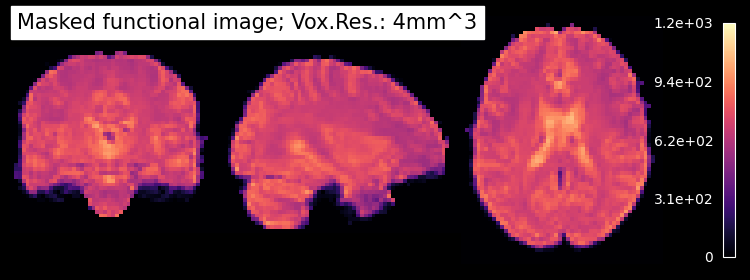

In [34]:
# 곱하기.
img_cleand = math_img('img1 * img2', img1 = img_func, img2 = img_mask.slicer[...,None])

# Remove as mant zero rows in the data matrix to reduce overall volume size
from nilearn.image import crop_img
img_crop = crop_img(img_cleand)

# plot
from nilearn.plotting import plot_anat
plot_anat(img_crop.slicer[..., 0], dim='auto', draw_cross=False, annotate=False,
          cmap='magma', vmax=1250, cut_coords=[33, -20, 20], colorbar=True,
          title='Masked functional image; Vox.Res.: 4mm^3')

# Preparing the data
한번에 하면 아래와 같은 코드일 거임.

In [ ]:
# 이미지 불러오기
file = '~'
img_func = nb.load_file)
추세 제거, z-score하고 새로운 데이터로 저장.ile
data = img_func.get_fdata()
data = detrend(data)
data = np.nan_to_num(zscore(data, axis=0))
img_standardized = nb.Nifti1Image(data, img_func.affine, img_func.header)

# Create MNI-152 templ brain = nb.load('~')i img2=eyes)
img_resampled = resbraino_img(img_roi, img_func)
data_binary = np.array(img_resampled.get_fdata()>=10, dtype=np.int8)
data_dilated = binary_dilation(data_binary, iterations=1).astype(np.int8)
img_mask = nb.Nifti1Image(data_dilated, img_resampled.affine, img_resampled.header)
img_mask.set_dat곱해주고, 0제거mask and crop image
img_cleaned = math_img('img1 * img2',
                       img1=img_standardized, img2=img_mask.slicer[..., None])
img_crop =

# plot으로 표시
plot_anat(img_crop.slicer[..., 0], dim='auto', draw_cross=False, annotate=False,
          cmap='magma', cut_coords=[33, -20, 20], colorbar=True,
          title='Masked and standardized functional image; Vox.Res.: 4mm^3') crop_img(img_cleaned)

# Creating the machine learning dataset

이번엔 100개의 volume을 가져와서 4개의 동일한 길이의 섹션에 대한 표준편차를 보자.

In [45]:
img_std1 = nb.Nifti1Image(img_crop.get_fdata()[...,0:25].std(axis=-1), img_crop.affine, img_crop.header)
img_std2 = nb.Nifti1Image(img_crop.get_fdata()[...,25:50].std(axis=-1), img_crop.affine, img_crop.header)
img_std3 = nb.Nifti1Image(img_crop.get_fdata()[...,50:75].std(axis=-1), img_crop.affine, img_crop.header)
img_std4 = nb.Nifti1Image(img_crop.get_fdata()[...,75:100].std(axis=-1), img_crop.affine, img_crop.header)

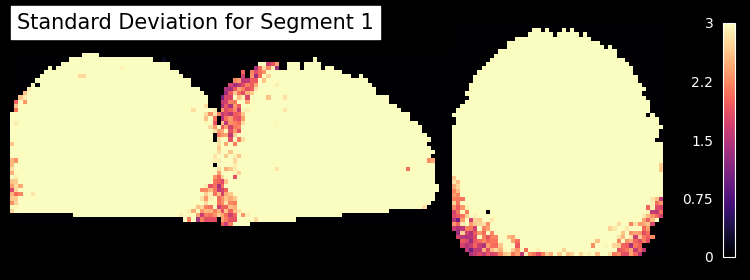

In [46]:
plot_anat(img_std1, draw_cross=False, annotate=False, cmap='magma',
          cut_coords=[33, -20, 20], vmax=3, colorbar=True,
          title='Standard Deviation for Segment 1')
# 노란색이 표준편차 높음. 변동성이 크다는거.(활발했다는 뜻)

만약 내가 하려는거에 맞춘다면.. 높은 점수를 줬을 때와, 낮을 점수를 줬을 때의 run 각각에 대해

데이터셋의 전체 subjects에 대해 수행한다면.., 각 voxel당 4개의 분할x점수 2가지x참가자 29명이니까 232개 데이터 포인트 얻을거임.

그러니가 29명에 대한 전처리는 알아서 해야..